In [54]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
from polire.random.random import Random
from polire.trend.trend import Trend
from polire.spline.bspline import BSpline
from polire.gp.gp import GaussianProcess
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import colors
import seaborn as sns
import sys

In [84]:
df = pd.read_csv("../testdata/daily_44201_2018.csv")

In [85]:
df.head(3)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,21,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2019-02-12
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,30,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2019-02-12
2,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,41,NaN,-,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2019-02-12


In [86]:
some_value = 'Ozone'
df = df.loc[df['Parameter Name'] == some_value]

some_value = '2018-05-07'
df = df.loc[df['Date Local'] == some_value]

df = df.sample(frac=1)
df.shape

(1240, 29)

In [87]:
df_train, df_test = train_test_split(df, test_size=0.2)
df_train.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
346205,48,201,29,44201,2,30.039524,-95.673951,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,84,NaN,-,Northwest Harris County,16822 Kitzman,Texas,Harris,Tomball,"Houston-The Woodlands-Sugar Land, TX",2019-03-28
213118,27,163,6016,44201,1,45.168004,-92.765136,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,58,NaN,-,St. Croix Watershed Research Station,St. Croix Trail N,Minnesota,Washington,Not in a city,"Minneapolis-St. Paul-Bloomington, MN-WI",2019-03-05
69701,6,79,3001,44201,1,35.366310,-120.842710,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,35,NaN,-,Morro Bay,"MORRO BAY BLVD & KERN AVE, MORRO BAY",California,San Luis Obispo,Morro Bay,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",2019-03-26
54430,6,65,1004,44201,1,33.939700,-115.410800,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,108,NaN,-,Joshua Tree NP - Pinto Wells,Joshua Tree National Park - Pinto Wells,California,Riverside,Joshua Tree National Monument,"Riverside-San Bernardino-Ontario, CA",2019-02-13
66792,6,73,1016,44201,1,32.845467,-117.123894,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,43,NaN,-,Kearny Villa Rd.,"6125A KEARNY VILLA RD., SAN DIEGO",California,San Diego,San Diego,"San Diego-Carlsbad, CA",2019-02-26


In [88]:
df.columns

Index(['State Code', 'County Code', 'Site Num', 'Parameter Code', 'POC',
       'Latitude', 'Longitude', 'Datum', 'Parameter Name', 'Sample Duration',
       'Pollutant Standard', 'Date Local', 'Units of Measure', 'Event Type',
       'Observation Count', 'Observation Percent', 'Arithmetic Mean',
       '1st Max Value', '1st Max Hour', 'AQI', 'Method Code', 'Method Name',
       'Local Site Name', 'Address', 'State Name', 'County Name', 'City Name',
       'CBSA Name', 'Date of Last Change'],
      dtype='object')

In [89]:
r = Random(resolution='standard')
trainX = df_train[['Longitude', 'Latitude']].values
trainy = df_train['Arithmetic Mean'].values
r.fit(trainX, trainy)

In [90]:
testX = df_test[['Longitude', 'Latitude']].values
testy = df_test['Arithmetic Mean'].values

In [91]:
x1max, x2max = np.max(trainX, axis=0)
print (x1max, x2max)
x1min, x2min = np.min(trainX, axis=0)

-66.126531 63.72320000000001


In [92]:
x1min, x1max, x2min, x2max

(-158.08861299999998, -66.126531, 18.440774, 63.72320000000001)

In [93]:
lss = [Random(), BSpline(kx=2, ky=2), Trend(order=2), GaussianProcess()]

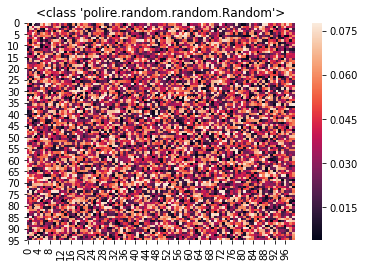

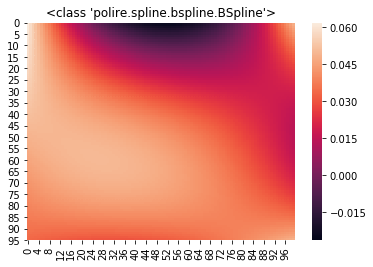

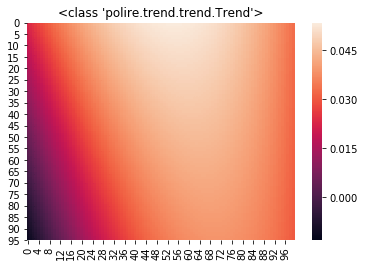

/home/apoorv/Desktop/github/spatial-interpolation/.env/lib/python3.6/site-packages/scikit_learn-0.21.2-py3.6-linux-x86_64.egg/sklearn/gaussian_process/gpr.py:469: ConvergenceWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.0631351]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 61, 'nit': 6, 'warnflag': 2}
  ConvergenceWarning)


TypeError: _predict_grid() takes 2 positional arguments but 3 were given

In [94]:
for r in lss:
    r.fit(trainX, trainy)
#     try:
    Z = r.predict_grid((x1min, x1max), (x2min, x2max)).reshape(100, 100)
    sns.heatmap(Z)
    plt.title(r.__class__)
    plt.show()
    plt.close()
#     except:
#         print (f"Was not able to. for {r.__class__}!")


In [ ]:
plt.figure(figsize=(14, 8))
h = plt.scatter(trainX[:, 0], trainX[:, 1], c = trainy)
plt.title("The training set used.")
plt.colorbar(h)

In [ ]:
for r in lss:
    r.fit(trainX, trainy)
    try:
        fig, ax = plt.subplots(ncols=2, sharex=True, figsize=(16, 5))
        pred_y = r.predict(testX)
        vmin = min(testy)
        vmax = max(testy)
        norm = colors.Normalize(vmin=vmin, vmax=vmax)
        inter = ax[0].scatter(testX[:, 0], testX[:, 1], c = pred_y)
        ax[0].set_title(f"Interpolation {r.__class__}")
        gt = ax[1].scatter(testX[:, 0], testX[:, 1], c = testy)
        
        # normalize colorbar
        inter.set_norm(norm)
        gt.set_norm(norm)
        fig.colorbar(gt, ax=ax, orientation='horizontal', fraction=.1)
        
        ax[1].set_title("GT")
        plt.show()
        
    except NotImplementedError as e:
        print (f"Was not able to. for {r.__class__}!")
        print(str(e))

In [ ]:
type(testX[:, 0])

In [ ]:
r.predict

In [ ]:
lims = 1, 3, 3, 5
resolution = 12
x1min, x1max, x2min, x2max = lims
x1 = np.linspace(x1min, x1max, resolution)
x2 = np.linspace(x2min, x2max, resolution)
X1, X2 = np.meshgrid(x1, x2)